In [1]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'
import ete3
from ete3 import Tree, TreeStyle, NodeStyle, faces, SeqMotifFace, TextFace, CircleFace
import pandas as pd
import urllib.request
from pathlib import Path


In [2]:
output_dir = "figs"

In [3]:
for f,url in (("../data/experimentally_tested_metrics.csv", "https://zenodo.org/record/7688668/files/experimentally_tested_metrics.csv"),
              ("../data/CuSOD_round2_round3.newick", "https://zenodo.org/record/7688668/files/CuSOD_round2_round3.newick"),
              ("../data/MDH_round2_round3.newick", "https://zenodo.org/record/7688668/files/MDH_round2_round3.newick")):
    
    if not Path(f).exists():
        urllib.request.urlretrieve(url, f)

data = pd.read_csv("../data/experimentally_tested_metrics.csv", index_col=0)

In [4]:
circle_size = 10
#colors = {"GAN":"black", "ESM-MSA":"black", "test":"black", "ASR":"black" ,"GAN-passing":"#17becf", "ESM-MSA-passing":"#17becf", "GAN-control":"#9467bd", "ESM-MSA-control":"#9467bd"}
colors = {"GAN":"black", "ESM-MSA":"black", "test":"black", "ASR":"black" ,"GAN-passing":"#17becf", "ESM-MSA-passing":"#17becf", "GAN-control":"#cba0f2", "ESM-MSA-control":"#cba0f2"}
LINE_THICKNESS = 2

def node_layout(node, data):
    node.img_style["hz_line_width"] = LINE_THICKNESS # Change the horizotal lines stroke size
    node.img_style["vt_line_width"] = LINE_THICKNESS # Change the vertical lines stroke size
    if node.is_leaf():
        row = data.loc[node.name]

        color = colors[row["Model"]]
        #faces.add_face_to_node(TextFace(node.name, fgcolor=color), node, column=0, aligned=False)
        
        if row["Activity"] == 1:        
            faces.add_face_to_node(TextFace("X", fgcolor=color, fsize=12), node, column=1, aligned=False)
        else:
            faces.add_face_to_node(CircleFace(8, color), node, column=1, aligned=False)
      


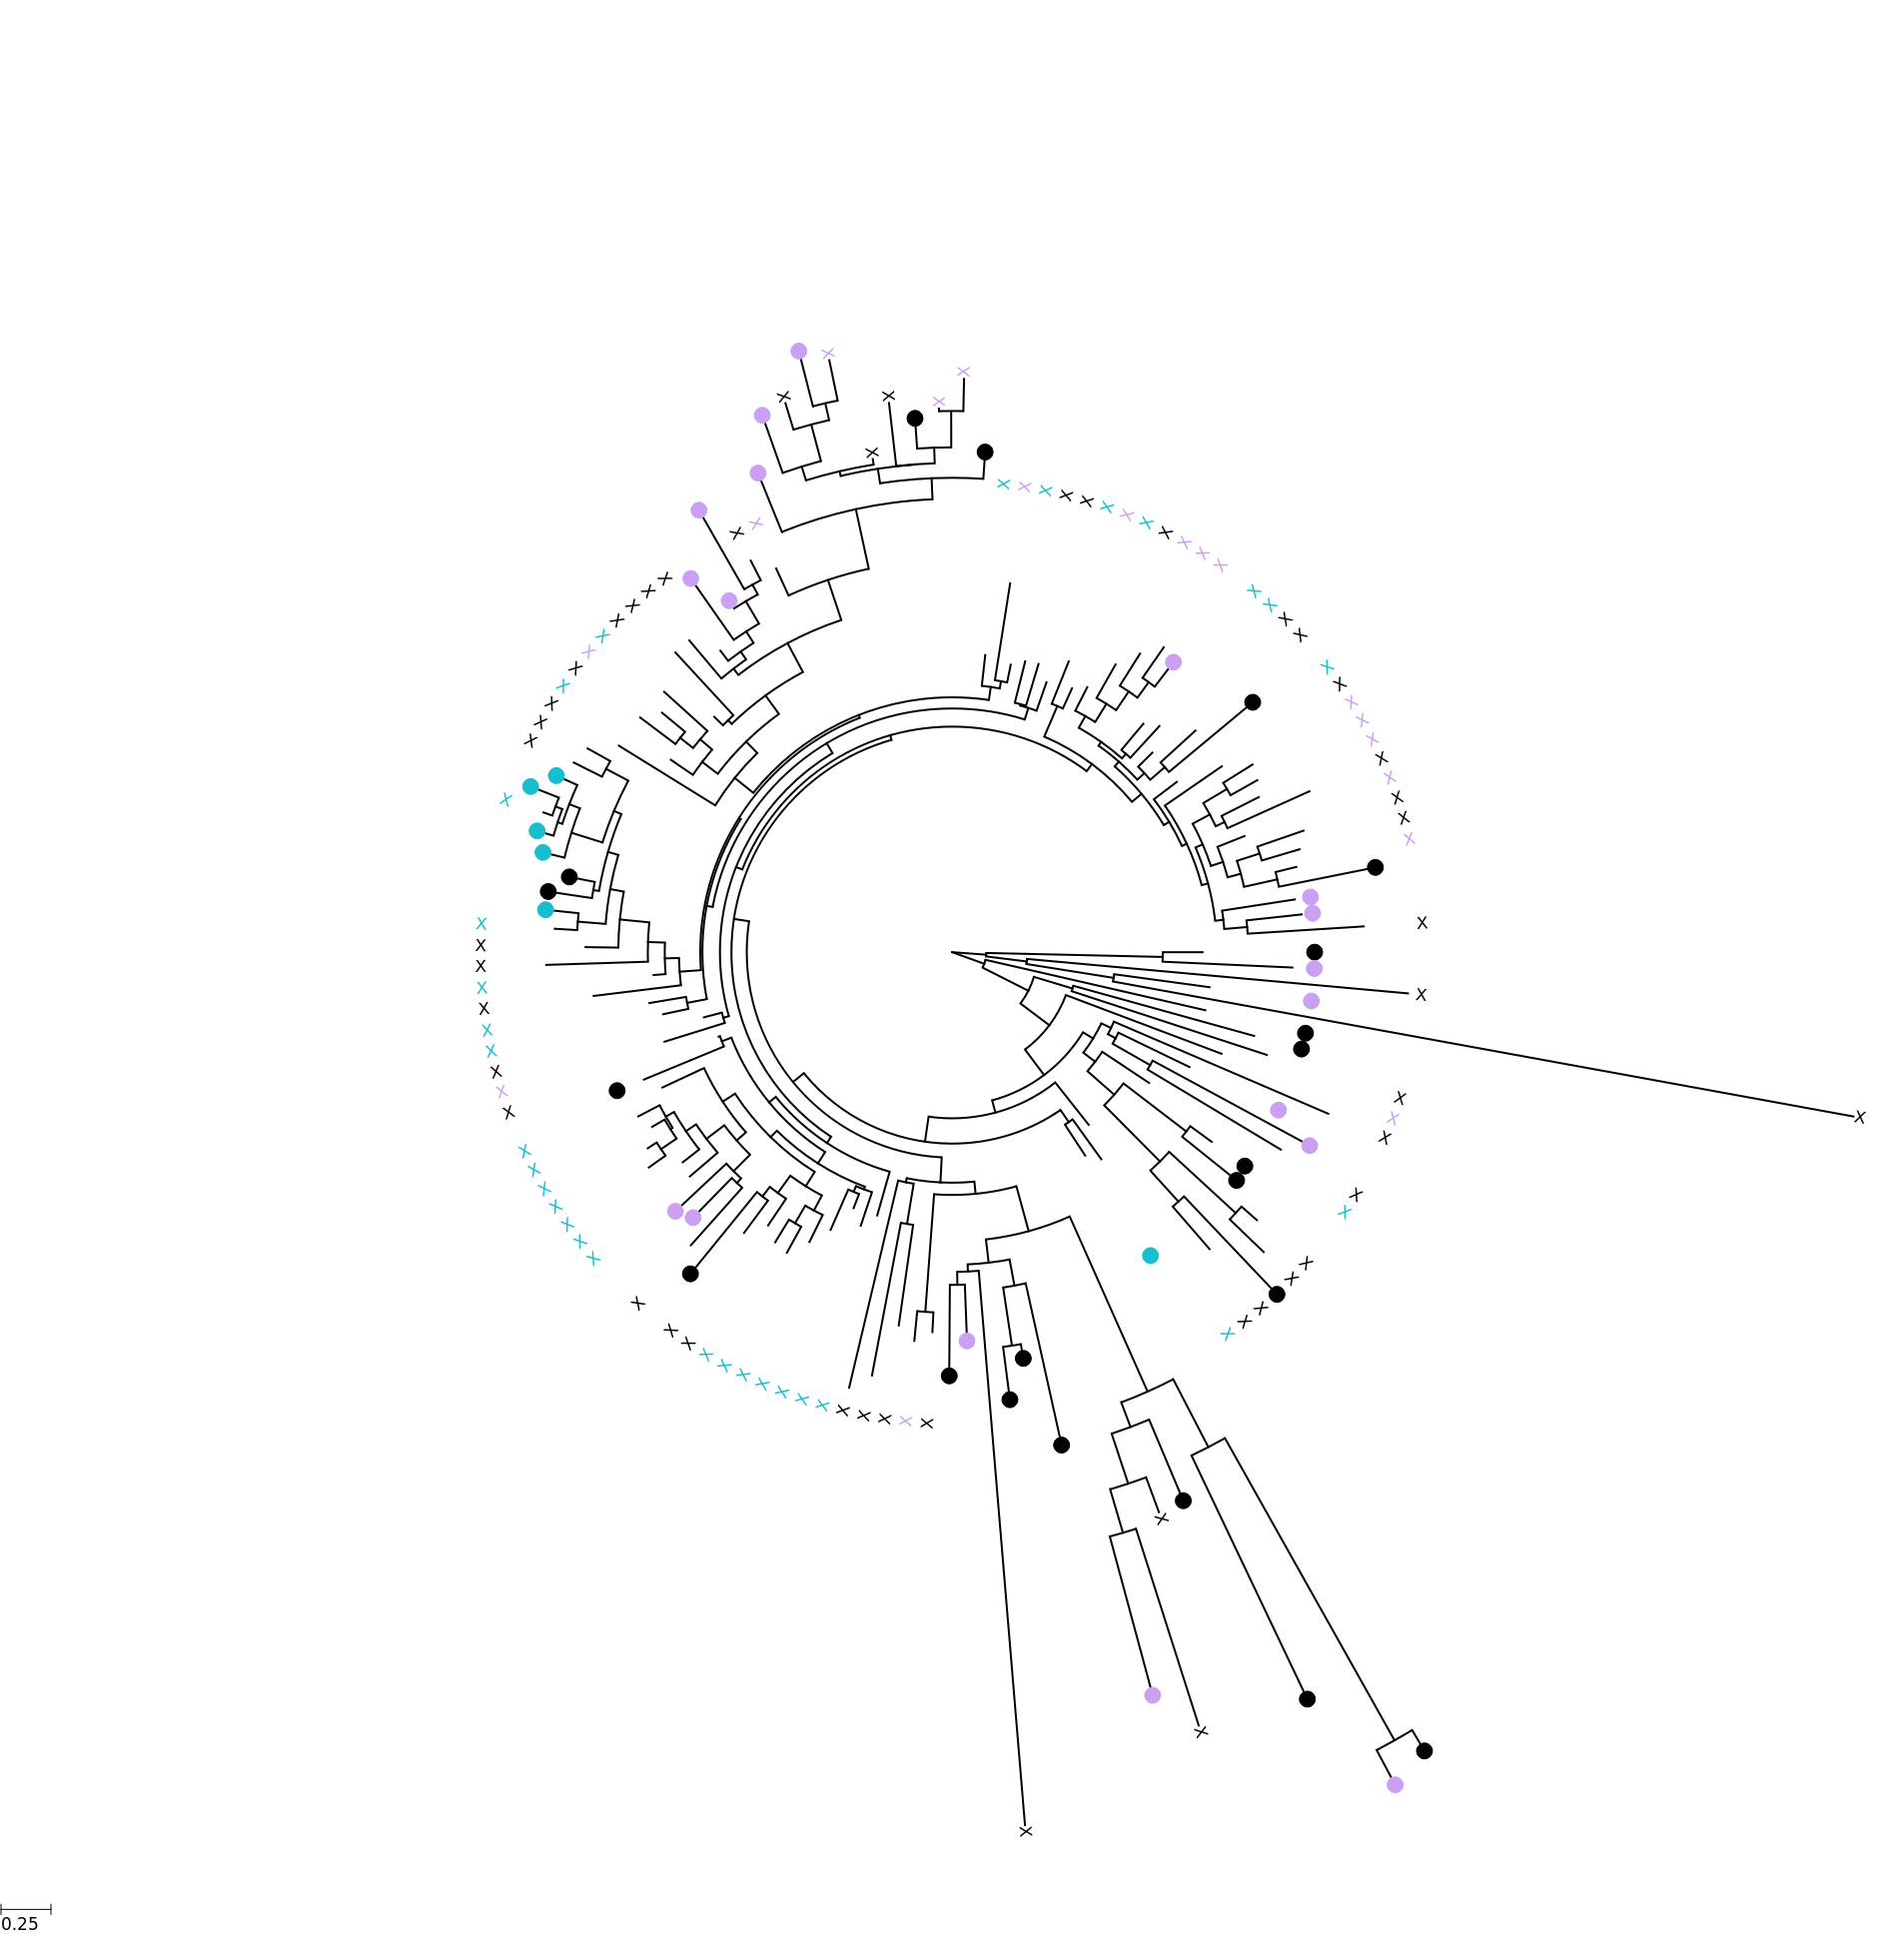

In [5]:
t = ete3.Tree("../data/CuSOD_round2_round3.newick")

# Calculate the midpoint node
midpoint = t.get_midpoint_outgroup()

# Set midpoint as outgroup.
t.set_outgroup(midpoint)

ns = NodeStyle()
ts = TreeStyle()
ts.scale = 200
ts.show_leaf_name = False
ts.layout_fn = lambda x: node_layout(x, data)
ts.mode = 'c'
ts.extra_branch_line_color = "white"

ns["size"] = 0

for n in t.traverse():
    n.set_style(ns)

    
t.render("%%inline", tree_style=ts)
#t.render(f"{output_dir}/CuSOD_round2_round3_tree_circular.svg", tree_style=ts)
#t.render(f"{output_dir}/CuSOD_round2_round3_tree_circular.png", dpi=300, tree_style=ts)
#t.render(f"{output_dir}/CuSOD_round2_round3_tree_rectangular.png", dpi=300, tree_style=ts)

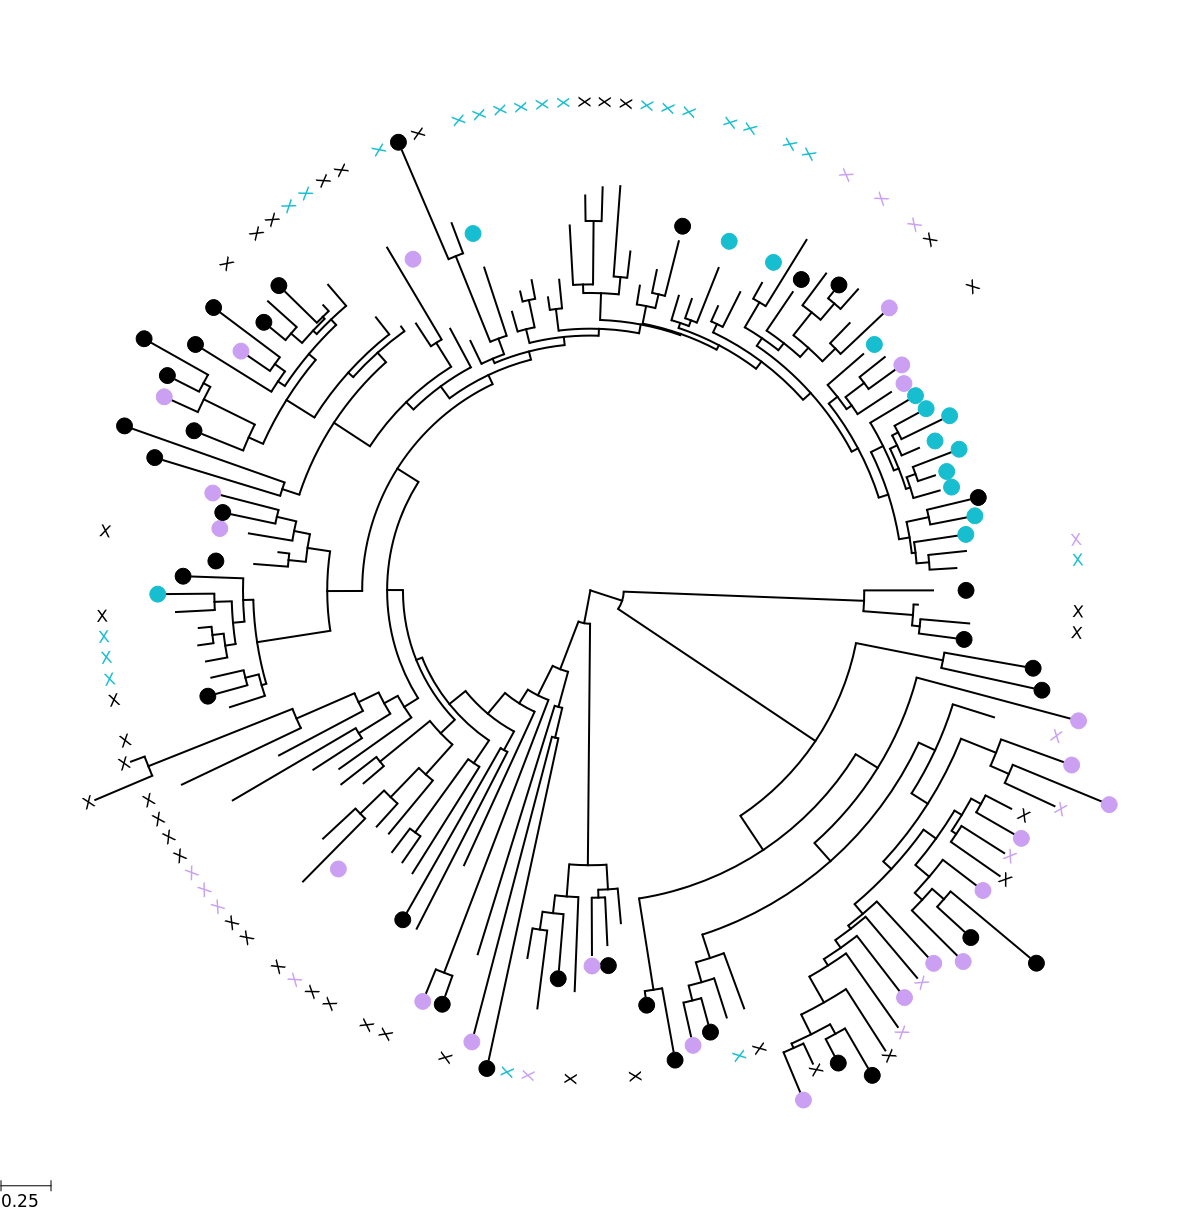

In [6]:
t = ete3.Tree("../data/MDH_round2_round3.newick")
# Calculate the midpoint node
midpoint = t.get_midpoint_outgroup()

# Set midpoint as outgroup.
t.set_outgroup(midpoint)


ns = NodeStyle()
ts = TreeStyle()
ts.scale = 200
ts.show_leaf_name = False
ts.layout_fn = lambda x: node_layout(x, data)
ts.mode = "c"
ts.extra_branch_line_color = "white"

ns["size"] = 0

for n in t.traverse():
    n.set_style(ns)

    
t.render("%%inline", tree_style=ts)
#t.render(f"{output_dir}/MDH_round2_round3_tree_circular.png", dpi=300, tree_style=ts)
#t.render(f"{output_dir}/MDH_round2_round3_tree_circular.svg", tree_style=ts)
#t.render(f"{output_dir}/MDH_round2_round3_tree_rectangular.png", dpi=300, tree_style=ts)
